In [20]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [23]:
#Create a clustering model
points_n = 200
clusters_n = 3
iteration_n = 100

points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
centroids = tf.Variable(tf.slice(tf.random.shuffle(points), [0, 0], [clusters_n, -1]))

points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)

means = []
for c in range(clusters_n):
    means.append(tf.reduce_mean(
      tf.gather(points,
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),[1]))

new_centroids = tf.concat(means, 0)

update_centroids =  tf.compat.v1.assign(centroids, new_centroids)
init = tf.compat.v1.global_variables_initializer()


KeyboardInterrupt: 

centroids <tf.Variable 'Variable:0' shape=(3, 2) dtype=float64, numpy=
array([[9.49496328, 4.88028246],
       [4.79237431, 3.84436819],
       [5.55841861, 8.743801  ]])>
centroids <tf.Variable 'Variable:0' shape=(3, 2) dtype=float64, numpy=
array([[9.49496328, 4.88028246],
       [4.79237431, 3.84436819],
       [5.55841861, 8.743801  ]])>
centroids <tf.Variable 'Variable:0' shape=(3, 2) dtype=float64, numpy=
array([[9.49496328, 4.88028246],
       [4.79237431, 3.84436819],
       [5.55841861, 8.743801  ]])>
centroids <tf.Variable 'Variable:0' shape=(3, 2) dtype=float64, numpy=
array([[9.49496328, 4.88028246],
       [4.79237431, 3.84436819],
       [5.55841861, 8.743801  ]])>
centroids <tf.Variable 'Variable:0' shape=(3, 2) dtype=float64, numpy=
array([[9.49496328, 4.88028246],
       [4.79237431, 3.84436819],
       [5.55841861, 8.743801  ]])>
centroids <tf.Variable 'Variable:0' shape=(3, 2) dtype=float64, numpy=
array([[9.49496328, 4.88028246],
       [4.79237431, 3.84436819],
   

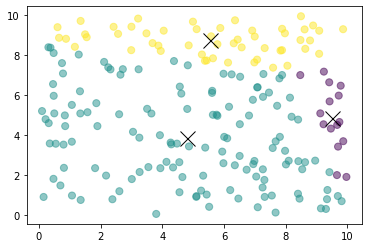

In [22]:
#Build clusters and display results
#with tf.compat.v1.Session() as sess:
 # sess.run(init)

for step in range(iteration_n):
    [_, centroid_values, points_values, assignment_values] = [update_centroids, centroids, points, assignments]

    print("centroids", centroid_values)

plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.show()